In [7]:
import numpy as np
import seaborn as sns
import pandas as pd
experiments = list(np.arange(10))

In [8]:
root_path = '../models/CNN/saved_models/experiment_dataset_debugging_fix_random_split'

In [9]:
frac_ours_list = []
frac_IF_list = []
frac_rep_list = []
frac_random_list = []
data = {'method': [],
        'Fraction of training data checked': [],
        'Mislabelled data identified': []}
for i in experiments:
    path = "{}/{}/orders".format(root_path, i)
    frac_ours_list.append(np.load('{}/order_ours.npz'.format(path), allow_pickle=True)['fraction_fixed'])
    frac_IF_list.append(np.load('{}/order_IF.npz'.format(path), allow_pickle=True)['fraction_fixed'])
    frac_rep_list.append(np.load('{}/order_rep.npz'.format(path), allow_pickle=True)['fraction_fixed'])
    frac_random_list.append(np.load('{}/order_random.npz'.format(path), allow_pickle=True)['fraction_fixed'])
data_ours = {'method': ['RPS-LJE' for i in range(20 * len(experiments))] +
                       ['Influence function' for i in range(20 * len(experiments))] +
                       ['RPS-$l_2$' for i in range(20 * len(experiments))] +
                       ['Random' for i in range(20 * len(experiments))],
             'Fraction of training data checked': list(np.linspace(0.05, 1, 20)) * len(experiments) * 4,
             'Mislabelled data identified': np.concatenate(
                 frac_ours_list + frac_IF_list + frac_rep_list + frac_random_list)}
df_frac = pd.DataFrame(data=data_ours)
# print(df)

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
acc_ours_list = []
acc_IF_list = []
acc_rep_list = []
acc_random_list = []
data = {'method': [],
        'Fraction of training data checked': [],
        'Mislabelled data identified': []}
for i in experiments:
    path = "{}/{}/accuracies".format(root_path, i)
    acc_ours_list.append(np.load('{}/accuracies_ours.npy'.format(path), allow_pickle=True))
    acc_IF_list.append(np.load('{}/accuracies_IF.npy'.format(path), allow_pickle=True))
    acc_rep_list.append(np.load('{}/accuracies_rep.npy'.format(path), allow_pickle=True))
    acc_random_list.append(np.load('{}/accuracies_random.npy'.format(path), allow_pickle=True))
data_ours = {'method': ['RPS-LJE' for i in range(8 * len(experiments))] +
                       ['Influence function' for i in range(8 * len(experiments))] +
                       ['RPS-$l_2$' for i in range(8 * len(experiments))] +
                       ['Random' for i in range(8 * len(experiments))],
             'Fraction of training data checked': list(np.linspace(0.05, 0.4, 8)) * len(experiments) * 4,
             'Testing accuracies': np.concatenate(
                 acc_ours_list + acc_IF_list + acc_rep_list + acc_random_list)}
df_acc = pd.DataFrame(data=data_ours)
# print(df)

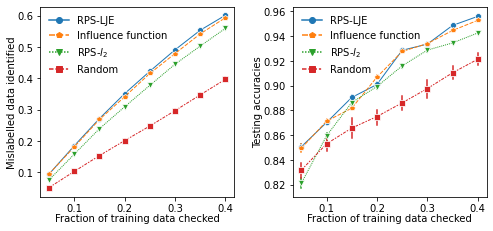

In [14]:
markers = ['o','p','v','s']
fig, axes=plt.subplots(1,2, figsize=(8,3.5))
ax0 = sns.lineplot(data=df_frac[df_frac['Fraction of training data checked'] <= 0.4],
                  x='Fraction of training data checked',
                  y='Mislabelled data identified', linewidth=1,
                  hue='method', err_style='bars', ci=99,
                  style='method', markers=markers, ax=axes[0])
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles=handles, labels=labels, frameon =False, loc='upper left')
ax0.set_ylabel('Mislabelled data identified',fontsize=10, labelpad=0)
ax0.set_xlabel('Fraction of training data checked', fontsize=10, labelpad=0)

ax1 = sns.lineplot(data=df_acc[df_acc['Fraction of training data checked'] <= 0.4],
                  x='Fraction of training data checked',
                  y='Testing accuracies', linewidth=1,
                  hue='method', err_style='bars', ci=99,
                  style='method', markers=markers, ax=axes[1])
ax1.set_ylabel('Testing accuracies',fontsize=10, labelpad=0)
ax1.set_xlabel('Fraction of training data checked', fontsize=10, labelpad=0)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=labels, frameon =False, loc='upper left')

plt.subplots_adjust(wspace=0.3,hspace=0)
plt.savefig('figs/cnn_fixed_random_split', bbox_inches='tight')